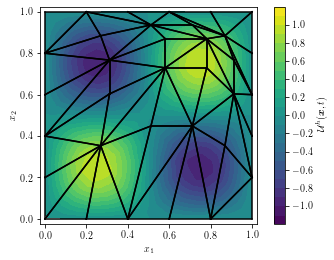

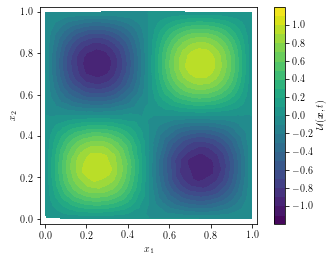

In [26]:
# GHOST - Projection Test (2D)

import sys  
import numpy as np
import modepy as mp
sys.path.insert(0, '../src')
from Mesh import Mesh2D
from Discretization import SpatialDiscretization
from Solver import Solver

# discretization degree
p = 3

# geometry mapping degree
p_geo = 1

# read in mesh in GMSH format
mesh = Mesh2D("test", "../mesh/square_mesh_L1_x_6y_6.msh")

# set up periodic boundary conditions
left = np.array([1.0,0.0,0.0]) 
right = np.array([1.0,0.0,1.0])
bottom = np.array([0.0,1.0,0.0])
top = np.array([0.0,1.0,1.0])
mesh.add_bc_on_hyperplanes([left,right,bottom,top],[1,2,3,4])
mesh.make_periodic((1,2),[1]) # left-right periodic (bcs parallel to axis 1)
mesh.make_periodic((3,4),[0]) # top-bottom periodic (axis 0)

#curvilinear transformation used in Del Rey Fernandez et al. (2017)
mesh.map_mesh(f_map=Mesh2D.grid_transformation(warp_factor=0.2), p_geo=p_geo)

# volume and facet quadrature degrees
tau = 2*p
mu = 2*p+1

theta = np.pi/4
a = np.sqrt(2)

# solver parameters
params = {"project_title": "projection",
         "problem": "projection",
         "initial_condition": "sine",
         "wavelength": np.ones(2),
         "integration_type": "quadrature",
         "solution_degree": p,
         "volume_quadrature_degree": tau,
         "facet_quadrature_degree": mu}

# set up solver
weighted = Solver(params,mesh)
weighted.run()
weighted.post_process(error_quadrature_degree=4*p)
weighted.plot()

In [27]:
weighted.calculate_error()

array([0.0057327])

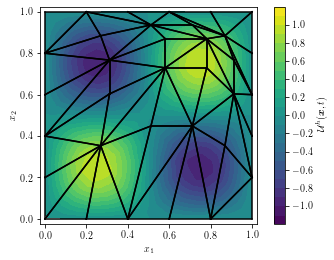

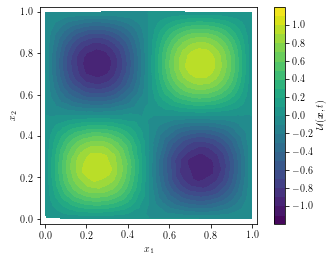

In [28]:
params_unweighted = params.copy()
params_unweighted["initial_projection"] = "unweighted"
unweighted = Solver(params_unweighted,mesh)
unweighted.run()
unweighted.post_process(error_quadrature_degree=4*p)
unweighted.plot()

In [29]:
unweighted.calculate_error()

array([0.0057327])

In [19]:
weighted.discretization.P[0]

array([[ 2.42301628e-01,  2.42301628e-01,  2.42301628e-01,
         1.14171002e-01,  1.14171002e-01,  1.14171002e-01,
         5.74659456e-02,  5.74659456e-02,  5.74659456e-02,
         5.74659456e-02,  5.74659456e-02,  5.74659456e-02],
       [-2.02810162e-01,  2.02810162e-01, -1.61547241e-16,
         2.81538936e-16,  1.23166456e-01, -1.23166456e-01,
        -9.81662158e-02,  1.15374019e-01, -1.72078031e-02,
         9.81662158e-02,  1.72078031e-02, -1.15374019e-01],
       [-1.21523081e-01, -1.21523081e-01, -9.03699192e-02,
        -2.03874792e-01,  6.89001199e-02,  6.89001199e-02,
         5.53549045e-02,  1.42285487e-01,  2.10492548e-03,
         5.53549045e-02,  2.10492548e-03,  1.42285487e-01],
       [ 2.72519386e-01, -2.72519386e-01,  3.16980290e-16,
        -2.21070732e-16,  2.11595290e-02, -2.11595290e-02,
         4.80460798e-02,  1.43133293e-01,  5.63554264e-05,
        -4.80460798e-02, -5.63554264e-05, -1.43133293e-01],
       [-1.17092502e-01, -1.17092502e-01,  2.3418500

In [20]:
weighted.discretization.P_J[0]

array([[ 2.42404771e-01,  2.42064094e-01,  2.42436019e-01,
         1.14295777e-01,  1.14266765e-01,  1.13950463e-01,
         5.73045041e-02,  5.74925165e-02,  5.76008160e-02,
         5.74663742e-02,  5.73157994e-02,  5.76156631e-02],
       [-2.03054968e-01,  2.03248802e-01, -1.93834642e-04,
        -1.79966604e-04,  1.22939165e-01, -1.22759199e-01,
        -9.78877324e-02,  1.15370411e-01, -1.74826789e-02,
         9.81199648e-02,  1.75047114e-02, -1.15624676e-01],
       [-1.21019315e-01, -1.19936471e-01, -9.24602953e-02,
        -2.05815610e-01,  6.93678437e-02,  7.03732146e-02,
         5.68643920e-02,  1.41110160e-01,  1.77076435e-03,
         5.63498867e-02,  2.67669200e-03,  1.40718738e-01],
       [ 2.63042058e-01, -2.87588507e-01,  2.45464489e-02,
         2.27902556e-02,  1.23602635e-02, -3.51505191e-02,
         3.20131372e-02,  1.58222188e-01,  1.00040327e-03,
        -6.14221227e-02, -3.79050824e-03, -1.26023097e-01],
       [-1.17464896e-01, -1.16046242e-01,  2.3351113

In [30]:
weighted.calculate_difference(unweighted)

array([2.29538723e-16])

In [22]:
weighted.params["initial_projection"]

'weighted'

In [23]:
unweighted.params["initial_projection"]

'weighted'